# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Daud Muhamad Azhari
- **Email:** irdazh@gmail.com
- **ID Dicoding:** irdazh

## Menentukan Pertanyaan Bisnis

- Bagaimana jumlah pesepeda harian selama tahun 2011 hingga 2012?
- Bagaimana temperatur, kelembapan, serta kecepatan angin berpengaruh terhadap banyaknya pesepeda?
- Kapan waktu paling favorit untuk bersepeda? Baik jam, minggu, serta bulan.
- Bagaimana kondisi cuaca (weathersit) berpengaruh terhadap banyaknya pesepeda?
- Ekstra: Clustering Pesepeda

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


## Data Wrangling

### Gathering Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
bike = pd.read_csv("/content/drive/MyDrive/Bangkit/Data/hour.csv")
display(bike.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


None

### Assessing Data

In [4]:
display(bike.describe(include="all"))
bike.weekday.value_counts()
bike.columns

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
for j in "season yr mnth hr holiday weekday workingday weathersit".split(" "):
  print(bike[[j]].value_counts())

season
3         4496
2         4409
1         4242
4         4232
dtype: int64
yr
1     8734
0     8645
dtype: int64
mnth
5       1488
7       1488
12      1483
8       1475
3       1473
10      1451
6       1440
4       1437
9       1437
11      1437
1       1429
2       1341
dtype: int64
hr
17    730
16    730
13    729
15    729
14    729
12    728
22    728
21    728
20    728
19    728
18    728
23    728
11    727
10    727
9     727
8     727
7     727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
dtype: int64
holiday
0          16879
1            500
dtype: int64
weekday
6          2512
0          2502
5          2487
1          2479
3          2475
4          2471
2          2453
dtype: int64
workingday
1             11865
0              5514
dtype: int64
weathersit
1             11413
2              4544
3              1419
4                 3
dtype: int64


### Cleaning Data
1. Mengubah dteday menjadi tipe data datetime.
2. Pengecekan missing value &rarr; tidak ada data yang hilang
3. Pengecekan data duplikat: tidak ada data yang terduplikat.

Bersih, lanjut ke proses berikutnya.

In [6]:
bike.dteday = pd.to_datetime(bike.dteday)

display(bike.isna().sum())

display(bike.duplicated().sum())


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

0

## Exploratory Data Analysis (EDA)

### Pengelompokkan Data
1. Rerata pesepeda per jam
2. Rerata pesepeda per minggu, dengan terlebih dahulu melakukan agregat secara harian.
3. Jumlah pesepeda tiap bulannya.

In [7]:
bike_hourly = bike.groupby(by="hr").agg({"cnt":"mean"}).reset_index()
bike_daily = bike.groupby(by="dteday").agg({"weekday":"mean", "cnt":"sum"})
bike_weekly = bike_daily.groupby(by="weekday").mean()
bike_monthly = bike.groupby(by="mnth")[["cnt"]].sum()

display(
    bike_hourly.head(),
    bike_weekly.head(),
    bike_monthly.head())


,hr,cnt
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941


,cnt
weekday,
0.0,4228.828571
1.0,4338.123810
2.0,4510.663462
3.0,4548.538462
4.0,4667.259615


,cnt
mnth,
1,134933
2,151352
3,228920
4,269094
5,331686


### Jumlah pesepeda berdasarkan kondisi cuaca (weathersit)

In [8]:
bike_weather = bike.groupby("weathersit")[["cnt"]].sum()

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana jumlah pesepeda harian selama tahun 2011 hingga 2012?


<Axes: xlabel='dteday'>

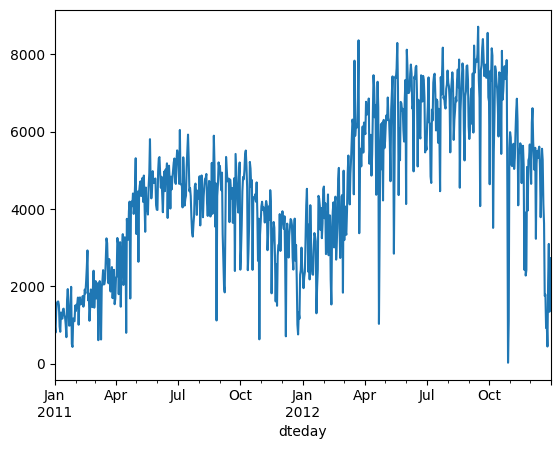

In [9]:
bike_daily.cnt.plot()

### Pertanyaan 2:
Bagaimana temperatur, kelembapan, serta kecepatan angin berpengaruh terhadap banyaknya pesepeda?


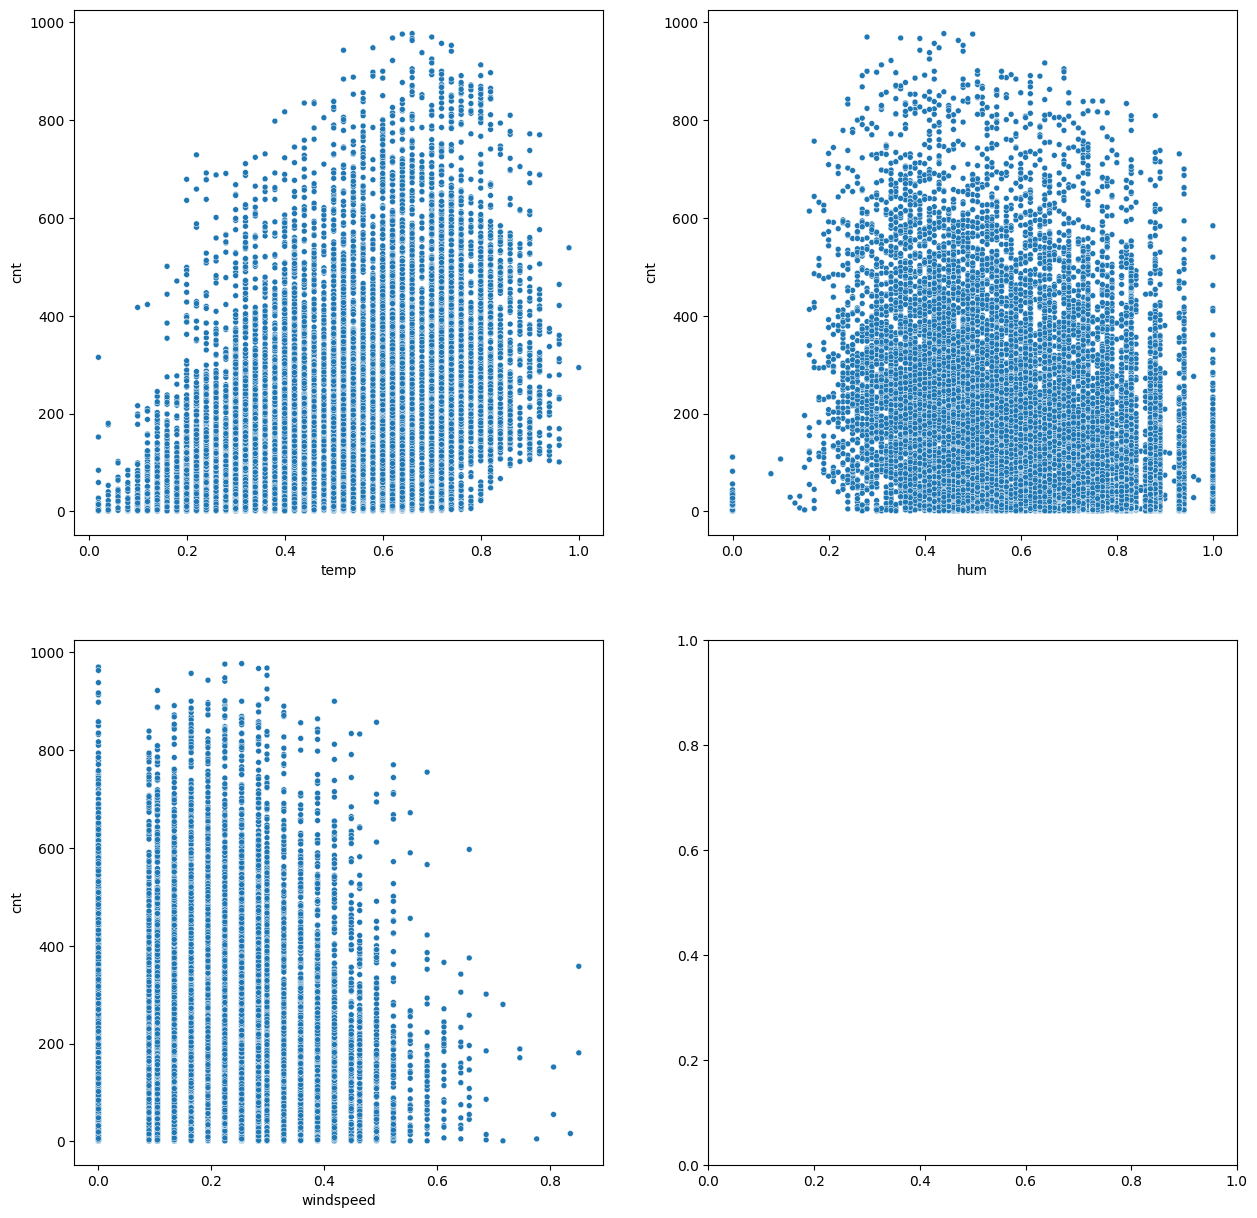

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15), sharey=False)
axes = axes.ravel()

for i, var in enumerate("temp hum windspeed".split(" ")):
    sns.scatterplot(data=bike, x=var, y="cnt", ax=axes[i],
                    size=5, legend=False)


### Pertanyaan 3:
Kapan waktu paling favorit untuk bersepeda? Baik jam, minggu, serta bulan.

<Axes: xlabel='mnth', ylabel='cnt'>

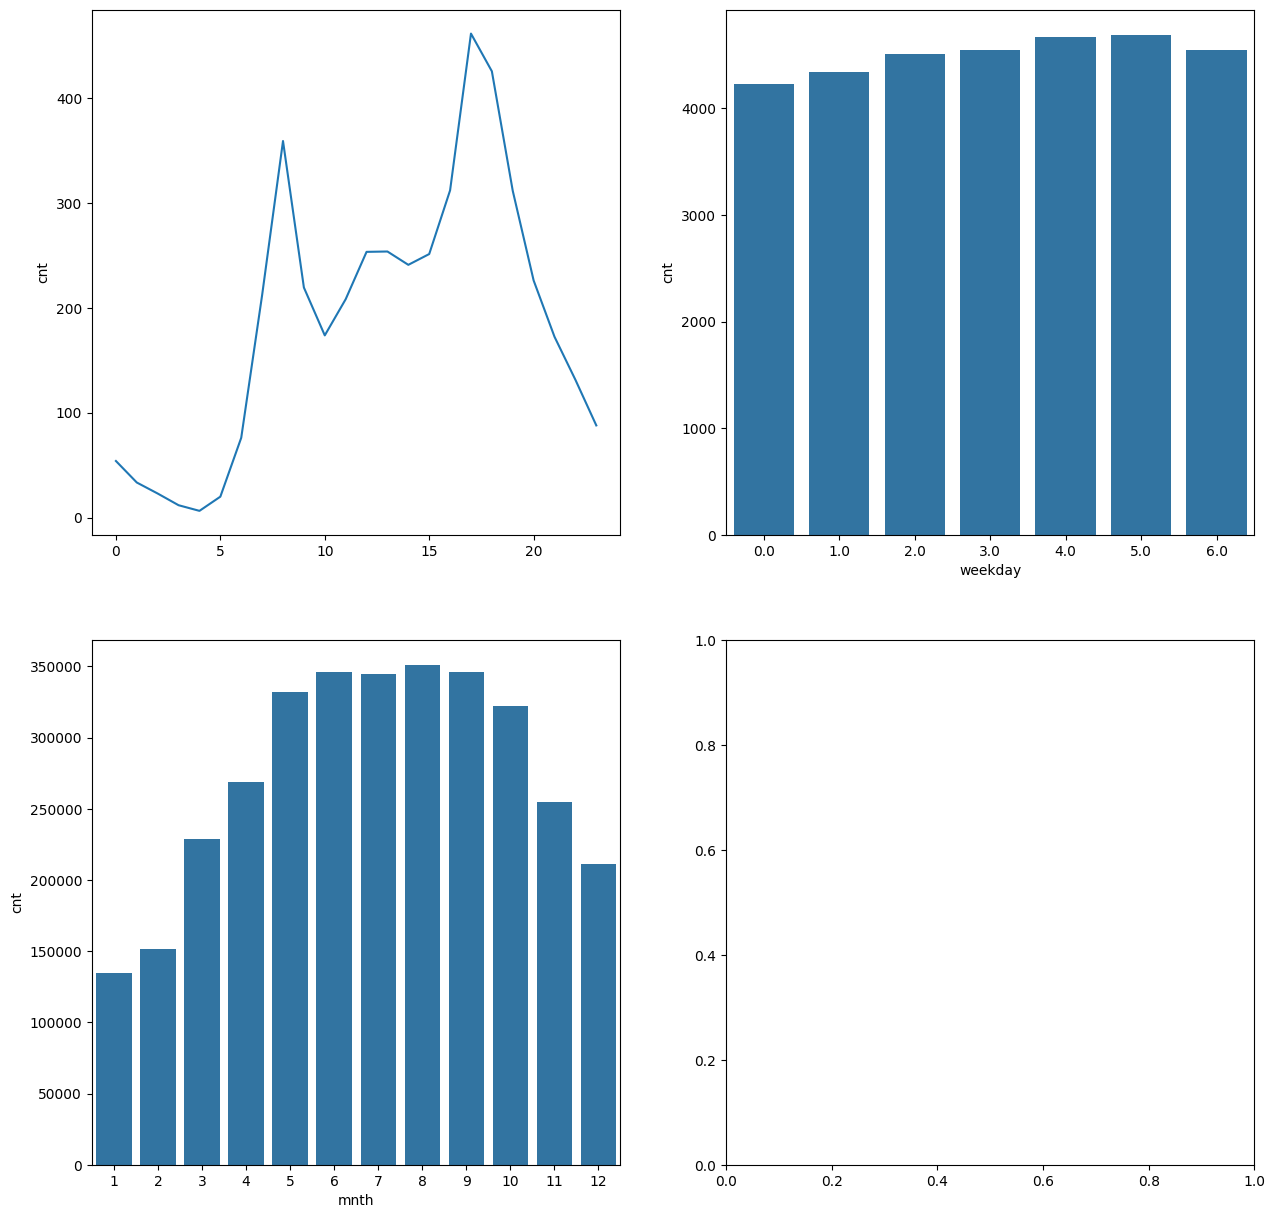

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15), sharey=False)
axes = axes.ravel()

sns.lineplot(bike_hourly.cnt, ax=axes[0])
sns.barplot(bike_weekly.cnt, ax=axes[1])
sns.barplot(bike_monthly.cnt, ax=axes[2])


### Pertanyaan 4:
Bagaimana kondisi cuaca (weathersit) berpengaruh terhadap banyaknya pesepeda?

<Axes: xlabel='weathersit', ylabel='cnt'>

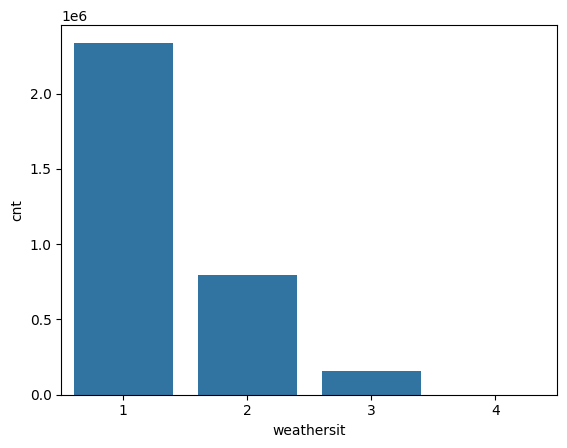

In [12]:
sns.barplot(bike_weather.cnt)

## Conclusion

- Banyak pesepeda beraktivitas di bulan Maret hingga Agustus, dengan kenaikan yang cukup terlihat dari tahun 2011 ke tahun 2012.
- Temperatur udara terlihat berpengaruh terhadap aktivitas bersepeda, makin panas, makin banyak orang bersepeda.
- Kelembapan udara seakan tidak berpengaruh terhadap pesepeda, mungkin memiliki pengaruh jika berinteraksi dengan temperatur.
- Kecepatan angin terlihat berpengaruh negatif terhadap bersepeda, makin kencang angin, makin sedikit pula orang bersepeda.
- Mayoritas pesepeda bersepeda ketika pagi menjelang siang dan sore hingga awal malam.
- Pesepeda juga terlihat tersebar secara merata untuk 7 hari dalam seminggu.
- Secara total, bulan Maret hingga Oktober memiliki jumlah pesepeda paling banyak dibandingkan lainnya. Hal ini tentu saja berhubungan dengan musim saat bulan-bulan tersebut.
- Makin ekstrem cuaca, makin sedikit orang bersepeda.

### An Extra: Clustering
1. Salin tempel data, hanya berupa temperature, humidity, windspeed, dan count
2. Normalisasi count dengan min-max normalization
3. Lakukan clustering
4. Ambil kesimpulan

In [13]:
# ambil 4 variabel
bike_cl = bike.copy()["temp hum windspeed cnt".split(" ")]

# lakukan normalisasi
bike_cl[["cnt"]] = bike_cl[["cnt"]].apply(lambda x: (x-min(x))/ (max(x)-min(x)))



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

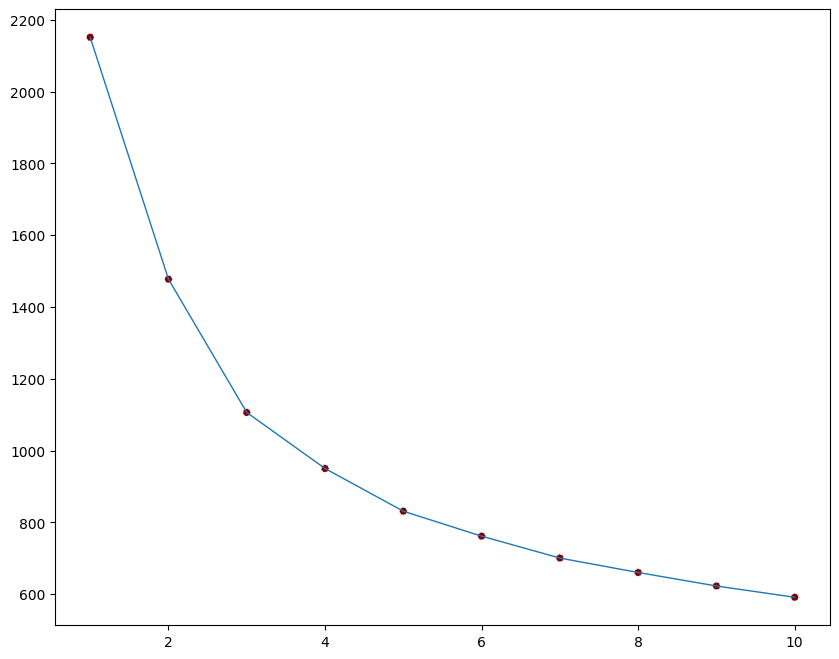

In [14]:
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(bike_cl)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(10, 8))

sns.lineplot(x=range(1, 11), y=inertia, linewidth = 1)
sns.scatterplot(x=range(1, 11), y=inertia, s=30, color='#800000',  linestyle='--')
plt.show()

In [15]:
# jumlah optimum cluster is 3
kmeans = KMeans(n_clusters=3, random_state=0).fit(bike_cl)
clusters = kmeans.labels_

# pembuatan PCA untuk visualisasi
pca = PCA(n_components=2)
pcs = pca.fit_transform(bike_cl)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca["clusters"] = clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


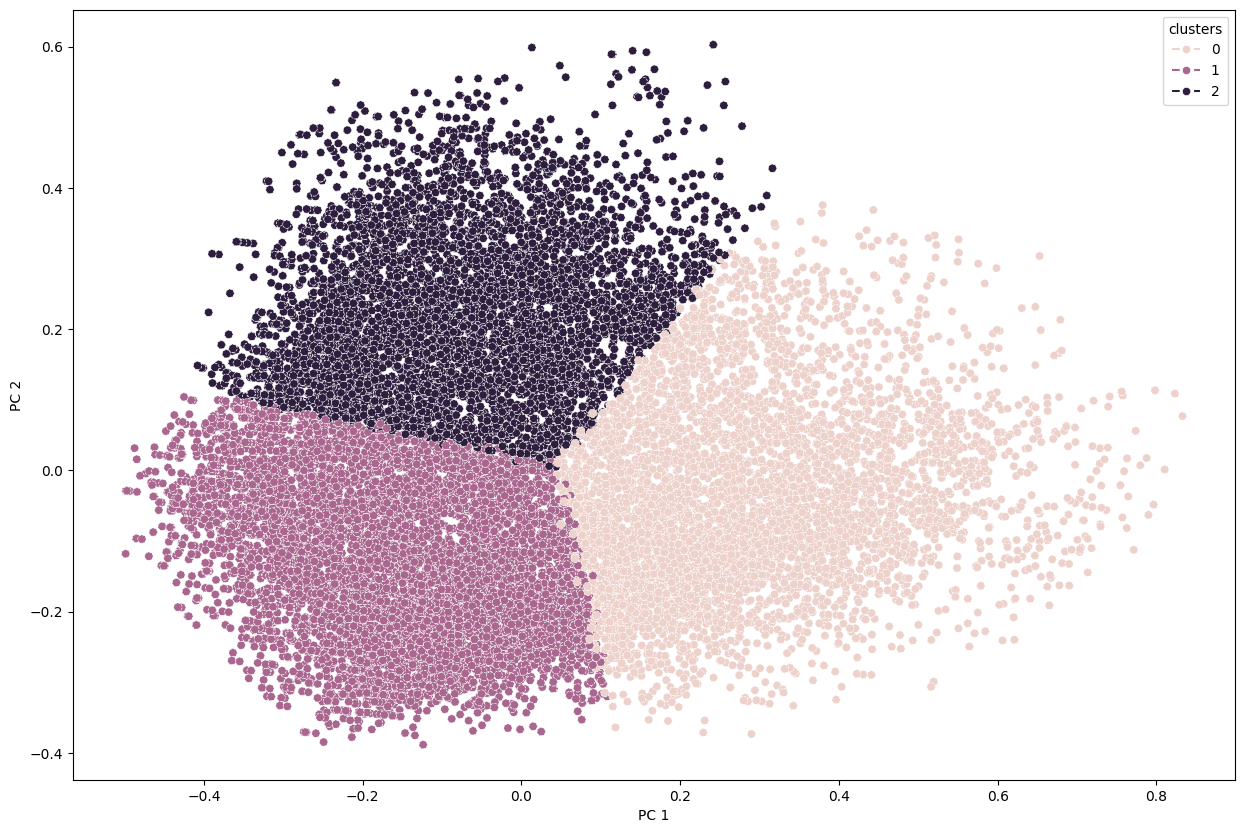

In [16]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x='PC 1', y='PC 2',
    hue='clusters',
    linestyle='--',
    data=df_pca,
    ax=ax
)

plt.show()

In [17]:
bike_cl1 = bike.copy()
bike_cl1["clusters"] = clusters

bike_cl1.groupby('clusters')["season mnth hr weekday weathersit temp hum windspeed cnt".split(" ")].agg(['median'])


,season,mnth,hr,weekday,weathersit,temp,hum,windspeed,cnt
,median,median,median,median,median,median,median,median,median
clusters,,,,,,,,,
0,3.0,7.0,15.0,3.0,1.0,0.70,0.51,0.1940,357.0
1,3.0,7.0,7.0,3.0,2.0,0.52,0.82,0.1343,62.0
2,1.0,3.0,12.0,3.0,1.0,0.32,0.50,0.2239,98.0


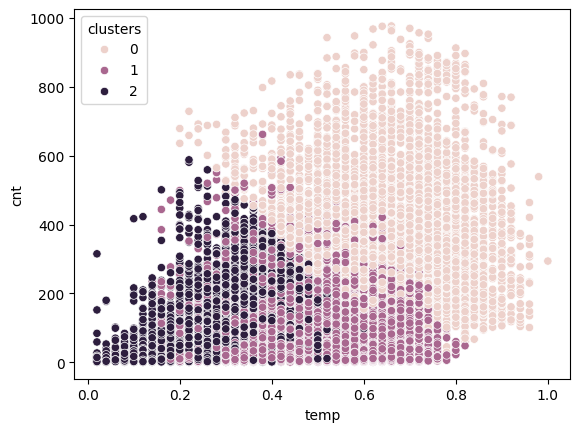

In [18]:
sns.scatterplot(data=bike_cl1, x="temp", y="cnt", hue="clusters", legend=True)
plt.show()

<Axes: xlabel='temp', ylabel='hum'>

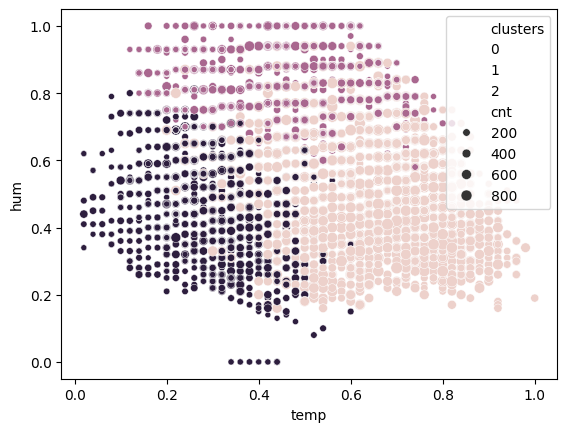

In [19]:
sns.scatterplot(data=bike_cl1, x="temp", y="hum", hue="clusters", s=0, size="cnt", legend=True)

### Kesimpulan Cluster:
1. Kluster pertama terdiri atas paling banyak pesepeda, jauh lebih tinggi dibandingkan kedua kluster lainnya, yang biasanya bersepeda di sekitar bulan Juli saat sore hari. Dengan kondisi cuaca cukup panas, kelembapan medium, dan kecepatan angin cukup rendah.
2. Kluster kedua terdiri atas paling sedikit pesepeda, yang bersepeda di sekitar bulan Juli saat pagi hari. Dengan kondisi temperatur medium, kelembapan cukup tinggi, dan kecepatan angin yang rendah.
3. Kluster terakhir juga terdiri dari sedikit pesepeda (sedikit lebih tinggi dibandingkan kluster kedua) yang biasanya bersepeda di bulan Maret ketika siang hari. Dengan temperatur cukup dingin, kelembapan udara medium, dan kecepatan angin cukup rendah.